# Customer Churn Prediction

#### Creating the Necessary Imports

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.io as pio
pio.renderers.default = 'iframe'
import pickle
import warnings
warnings.filterwarnings('ignore')

import sklearn
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The seaborn version is {}.'.format(sns.__version__))


The pandas version is 1.5.3.
The scikit-learn version is 1.3.1.
The seaborn version is 0.12.2.


#### Loading the dataset

In [2]:
dataset = pd.read_excel('customer_churn_large_dataset.xlsx')
dataset = dataset.drop(['CustomerID','Name'],axis=1)

### Dataset Analysis

In [3]:
display(dataset.head())
display(dataset.info())

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


None

In [4]:
dataset.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [5]:
dataset.isna().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [6]:
dataset.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [7]:
dataset['Gender'].describe(include=['object', 'bool'])

count     100000
unique         2
top       Female
freq       50216
Name: Gender, dtype: object

In [8]:
locations = dataset['Location'].unique()
print(locations)

['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [9]:
dataset.columns.values

array(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'], dtype=object)

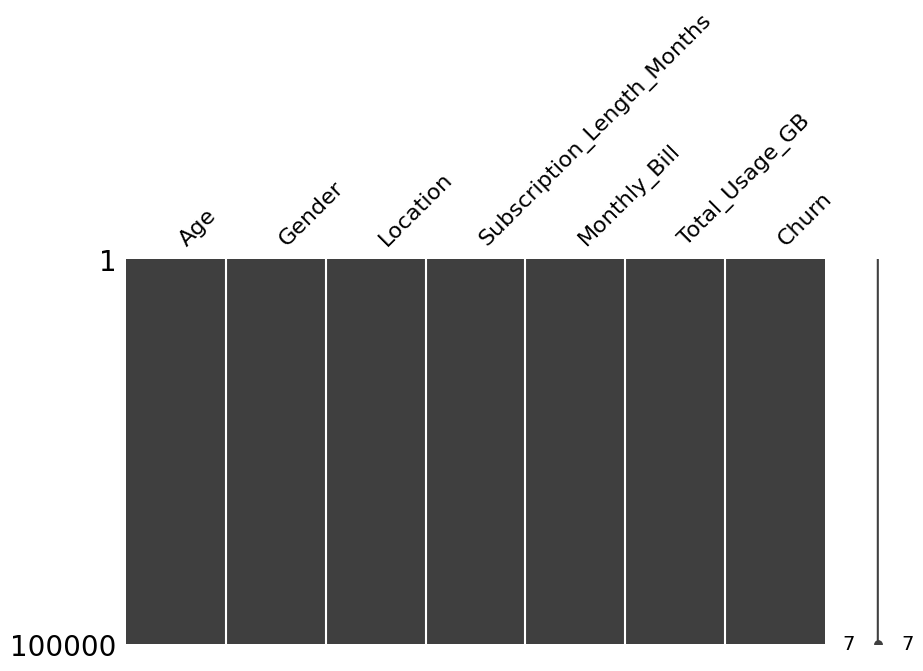

In [10]:
# Visualize missing values as a matrix
msno.matrix(dataset,figsize=(10,5));


### Data Visualization

#### Plotting Gender and Churn Distribution

In [11]:
dataset["Churn"][dataset["Churn"]== 1].groupby(by=dataset["Gender"]).count()

Gender
Female    24944
Male      24835
Name: Churn, dtype: int64

In [12]:
dataset["Churn"][dataset["Churn"]== 0].groupby(by=dataset["Gender"]).count()

Gender
Female    25272
Male      24949
Name: Churn, dtype: int64

In [13]:
# Churn = 0 => No;
# Churn = 1 => yes;
genderLabels = dataset['Gender'].unique()
churn_labels = ['No','Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=genderLabels, values=dataset['Gender'].value_counts(), name="Gender"),1, 1)
fig.add_trace(go.Pie(labels=churn_labels, values=dataset['Churn'].value_counts(), name="Churn"),1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.update_layout(width=1200, height=500)
fig.show()


* The dataset is balanced since it contains almost equal amount of data for both classes

In [14]:
pFemaleChurn = round(dataset[(dataset["Gender"] == "Female") & (dataset["Churn"] == 1)].count()[0] / dataset[(dataset["Gender"] == "Female")].count()[0] *100,2)
print(f'A female customer has a probability of {pFemaleChurn} % churn')

pMaleChurn = round(dataset[(dataset["Gender"] == "Male") & (dataset["Churn"] == 1)].count()[0] / dataset[(dataset["Gender"] == "Male")].count()[0]*100,2)
print(f'A male customer has a probability of {pMaleChurn} % churn')

A female customer has a probability of 49.67 % churn
A male customer has a probability of 49.89 % churn


#### Plotting the Distplot

In [15]:
# Plotting PDF  both the class labels
def distPlot(x, label1, y, label2, title):


  sns.distplot(x,label=label1)
  sns.distplot(y,label=label2)
  plt.title(title)
  plt.legend()
  plt.show()

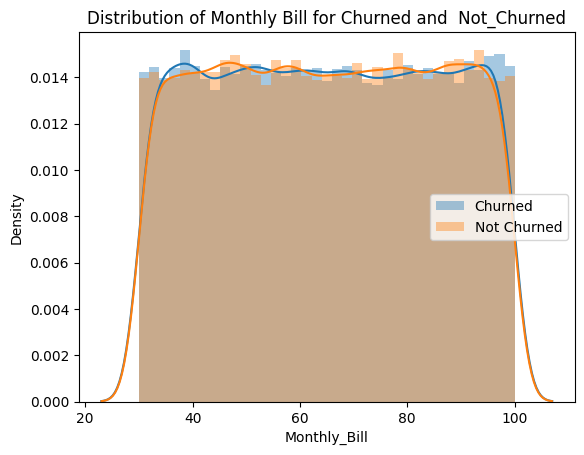

In [16]:
#  plotting the distribution between Monthly_Bill and Churn
monthlyBill_churned = dataset[dataset['Churn']==1]['Monthly_Bill']
monthlyBill_not_churned =dataset[dataset['Churn']==0]['Monthly_Bill']
title = 'Distribution of Monthly Bill for Churned and  Not_Churned'
distPlot(monthlyBill_churned,'Churned', monthlyBill_not_churned,'Not Churned',title)


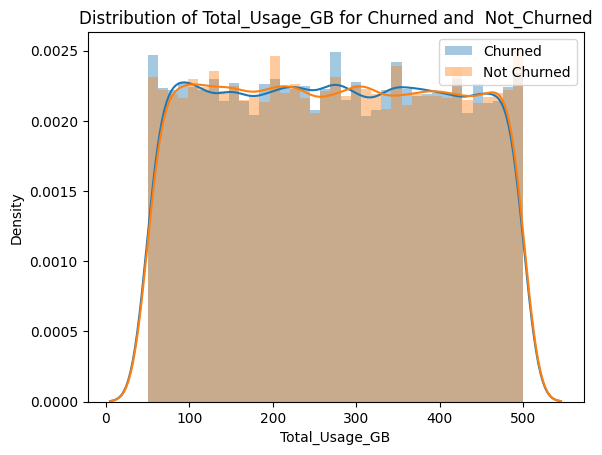

In [17]:
#  plotting the distribution between Total_Usage_GB and Churn
usage_churned = dataset[dataset['Churn']==1]['Total_Usage_GB']
usage_not_churned =dataset[dataset['Churn']==0]['Total_Usage_GB']
title = 'Distribution of Total_Usage_GB for Churned and  Not_Churned'
distPlot(usage_churned ,'Churned', usage_not_churned,'Not Churned',title)

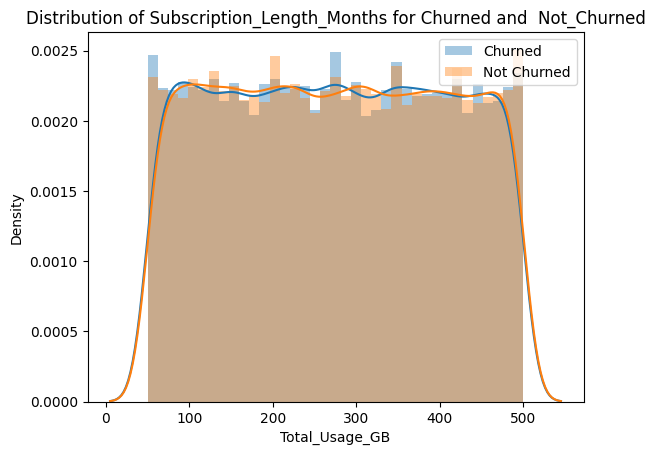

In [18]:
#  plotting the distribution between Subscription_Length_Months and Churn
months_churned = dataset[dataset['Churn']==1]['Subscription_Length_Months']
months_not_churned =dataset[dataset['Churn']==0]['Subscription_Length_Months']
title = 'Distribution of Subscription_Length_Months for Churned and  Not_Churned'
distPlot(usage_churned ,'Churned', usage_not_churned,'Not Churned',title)

#### Box Plot of Subscription_Length_Months and Churn

In [19]:
fig = px.box(dataset, x='Churn', y = 'Subscription_Length_Months')

# Update yaxis properties
fig.update_yaxes(title_text='Subscription_Length_Months', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Subscription_Length_Months vs Churn</b>',
)

fig.show()

#### Plotting the distribution of each Feature with relation to Churn

In [20]:

# Function to plot the sunburst graph which can show the
def plot_sunBurstGraph(path,title):
  fig = px.sunburst(dataset, path=path,title=title)

  fig.update_traces(textinfo="label+percent parent")
  fig.update_layout(width=700, height=500)

  fig.show()

In [21]:
plot_sunBurstGraph(['Churn', 'Gender'],"Sunburst Plot of Gender and Churn",)

In [22]:
plot_sunBurstGraph(['Churn', 'Location'],"Sunburst Plot of Locations and Churn")

In [23]:
plot_sunBurstGraph(['Churn', 'Subscription_Length_Months'],"Sunburst Plot of Subscription Length and Churn")

#### Correlation between the Features

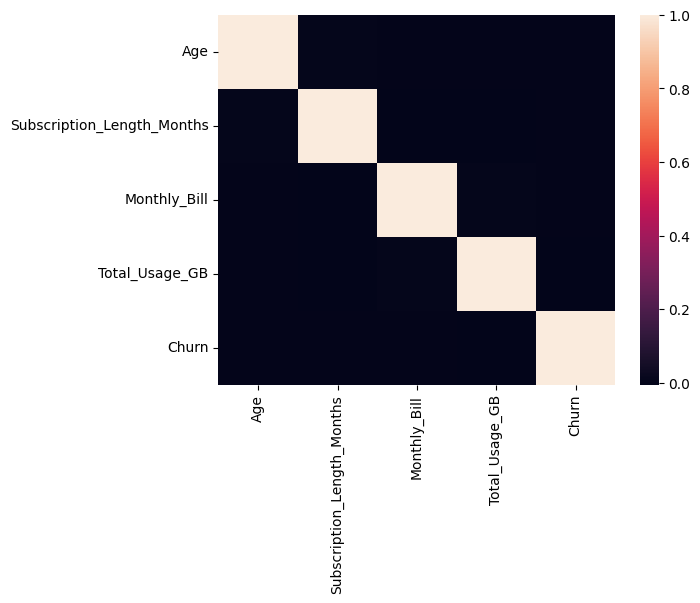

In [24]:
# plotting a heatmap to show the correlation between the columns
sns.heatmap(dataset.corr())
plt.show()

#### Finding  outliers

In [25]:
# Plotting Box and whisker plot for the numberical columns
def plot_boxAndWhisker(features,title):
  fig = make_subplots(rows=1, cols=len(features))
  pos =1
  for i in features:

    fig.add_trace(go.Box(y=dataset[i], notched=True, name=i,
                        boxmean=True, boxpoints='suspectedoutliers'), 1, pos)
    pos +=1

  fig.update_layout(title_text=title,height=500, width=1200)
  fig.show()

In [26]:

plot_boxAndWhisker(['Age', 'Subscription_Length_Months','Monthly_Bill', 'Total_Usage_GB'],'Box Plots for Numerical Variables' )

In [29]:
## Detect outliers
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(dataset[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = dataset[i][(dataset[i] > ul) | (dataset[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')


In [30]:
# (['Age', 'Gender', 'Location', 'Subscription_Length_Months','Monthly_Bill', 'Total_Usage_GB', 'Churn'], dtype=object)
detect_outliers(['Age', 'Subscription_Length_Months','Monthly_Bill','Total_Usage_GB'])

*** Age outlier points*** 
 Series([], Name: Age, dtype: int64) 

*** Subscription_Length_Months outlier points*** 
 Series([], Name: Subscription_Length_Months, dtype: int64) 

*** Monthly_Bill outlier points*** 
 Series([], Name: Monthly_Bill, dtype: float64) 

*** Total_Usage_GB outlier points*** 
 Series([], Name: Total_Usage_GB, dtype: int64) 



  No outliers were found in the numerical columns

## Data Preprocessing

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

num_cols = ['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
categorical_cols = ['Gender','Location']
dataset



,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [32]:
# splitting the data the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(dataset,dataset['Churn'],test_size = 0.30, random_state =1)

train_dict = X_train[categorical_cols + num_cols].to_dict(orient='records')

test_dict =X_test[categorical_cols + num_cols].to_dict(orient='records')

num_cols = ['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
categorical_cols = ['Gender','Location']

# using the DictVectorizer() to encode and transfor 
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)

## Model Training and Selection

In [33]:
# Scoring functions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


### XG BOOST

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def best_model(model):
    print(f'Score = {model.best_score_}\n')
    print(model.best_params_)
    print(model.best_estimator_)

# defining the parameters
param_grid = {'max_depth': [5,6,7,8],
              'gamma': [0.01,0.001,0.001],
              'min_child_weight':[1,5,10],
              'learning_rate': [0.05,0.1, 0.2, 0.3],
              'n_estimators':[5,10,20,100]}



In [35]:
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=1)

xgb_grid.fit(X_train,y_train)
best_model(xgb_grid)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Score = 0.5028

{'gamma': 0.001, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [36]:
xgb =best_model(xgb_grid)
import pickle

with open('xgb_and_dicVect.bin', 'ab') as f:
  pickle.dump((dv, xgb),f)
  f.close()


Score = 0.5028

{'gamma': 0.001, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [37]:
print("Training set score: %f" % xgb_grid.best_score_)
print(f'Test Data accuracy: {accuracy_score(xgb_grid.predict(X_test),y_test)}')

# xgb.predict(X_test)


Training set score: 0.502800
Test Data accuracy: 0.49966666666666665


### Random Forest Classifier with Gird Search Cross Validation

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define hyperparameter grid for RandomForest Classifier
param_grid = { 'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10] }

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5)
# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.5012714285714285


In [40]:
print("Training set score: %f" % grid_search.score(X_train, y_train))
print(f'Test Data accuracy: {accuracy_score(grid_search.predict(X_test),y_test)}')

Training set score: 0.540571
Test Data accuracy: 0.5045


In [41]:
with open('RF_and_dicVect.bin', 'ab') as f:
  pickle.dump((dv, grid_search),f)
  f.close()

### MLP Classifier

In [42]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(500,), max_iter=50, alpha=1e-8,
                    solver='adam', verbose=1, tol=1e-4, random_state=1,
                    learning_rate_init=.001,activation='relu',learning_rate='adaptive')

mlp.fit(X_train, y_train)


Iteration 1, loss = 0.76026696
Iteration 2, loss = 0.72081503
Iteration 3, loss = 0.73427883
Iteration 4, loss = 0.74254271
Iteration 5, loss = 0.74954915
Iteration 6, loss = 0.73778301
Iteration 7, loss = 0.73462135
Iteration 8, loss = 0.72332157
Iteration 9, loss = 0.72587751
Iteration 10, loss = 0.72656947
Iteration 11, loss = 0.72585588
Iteration 12, loss = 0.72786630
Iteration 13, loss = 0.73923408
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=1e-08, hidden_layer_sizes=(500,), learning_rate='adaptive',
              max_iter=50, random_state=1, verbose=1)

In [43]:
with open('mlp_and_dicVect.bin', 'ab') as f:
  pickle.dump((dv, grid_search),f)
  f.close()

In [44]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print(f'Test Data accuracy: {accuracy_score(mlp.predict(X_test),y_test)}')

Training set score: 0.501571
Test Data accuracy: 0.4956333333333333


## Model Evaluation

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

def get_preds(model,xtest):
    y_pred = model.predict(xtest)
    return y_pred
    
def get_classification_report(y_test,y_pred,title):
    print(title)
    print(classification_report(y_true=y_test,y_pred=y_pred))

# ROC Curve
def get_ROC_curve(model,X_test,title):
    y_rfpred_prob = model.predict_proba(X_test)[:,1]
    fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr_rf, tpr_rf, label=title,color = "r")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title+' ROC Curve',fontsize=16)
    plt.show()

# confusion matrix
def get_conf_matrix(y_test,y_pred,title):
        
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
    plt.title(title+" CONFUSION MATRIX",fontsize=14)
    plt.show()

### XGBoost

In [46]:
y_pred = get_preds(xgb_grid,X_test)

get_classification_report(y_test,y_pred,"Classification Report of XGBoost")

Classification Report of XGBoost
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     15110
           1       0.50      0.48      0.49     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



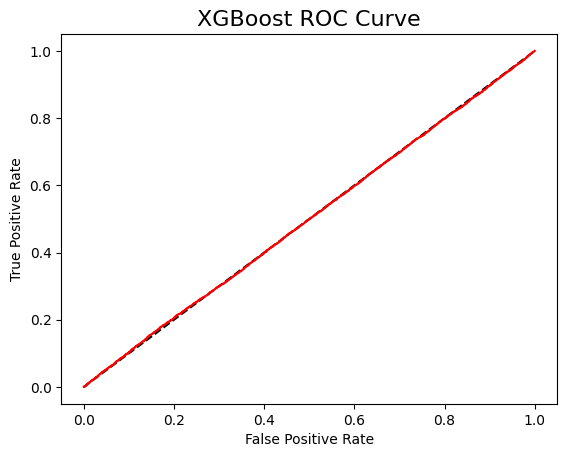

In [47]:
get_ROC_curve(xgb_grid,X_test,'XGBoost')

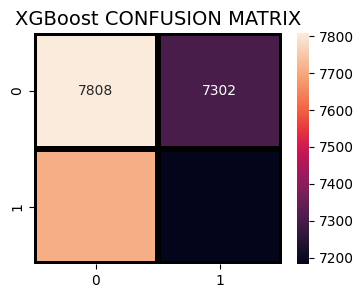

In [48]:
get_conf_matrix(y_test,y_pred,"XGBoost")

### Random Forest Classifier

In [49]:
y_pred = get_preds(grid_search,X_test)
get_classification_report(y_test,y_pred,"Classification Report of Random Forest")

Classification Report of Random Forest
              precision    recall  f1-score   support

           0       0.51      0.60      0.55     15110
           1       0.50      0.41      0.45     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



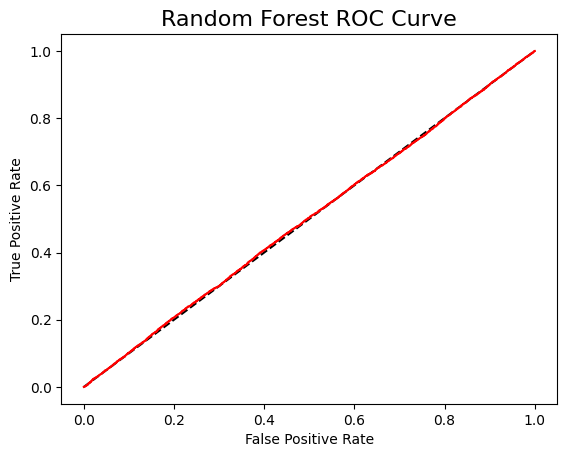

In [50]:
get_ROC_curve(grid_search,X_test,'Random Forest')

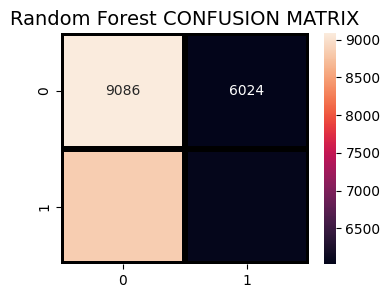

In [51]:
get_conf_matrix(y_test,y_pred,"Random Forest")

### MLP

In [52]:
y_pred = get_preds(mlp,X_test)
get_classification_report(y_test,y_pred,"Classification Report of MLP")

Classification Report of MLP
              precision    recall  f1-score   support

           0       0.49      0.03      0.05     15110
           1       0.50      0.97      0.66     14890

    accuracy                           0.50     30000
   macro avg       0.49      0.50      0.35     30000
weighted avg       0.49      0.50      0.35     30000



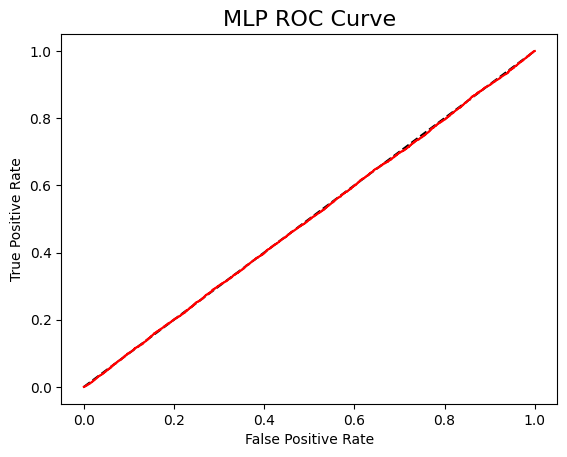

In [53]:
get_ROC_curve(mlp,X_test,'MLP')

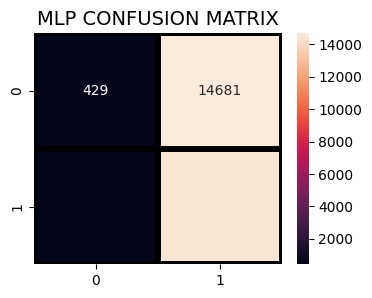

In [54]:
get_conf_matrix(y_test,y_pred,"MLP")